# 0. Подключение необходимыз библиотек + разрешение доступа к google-drive

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Создание датасетов

## 1.1 Создадим первый датасет

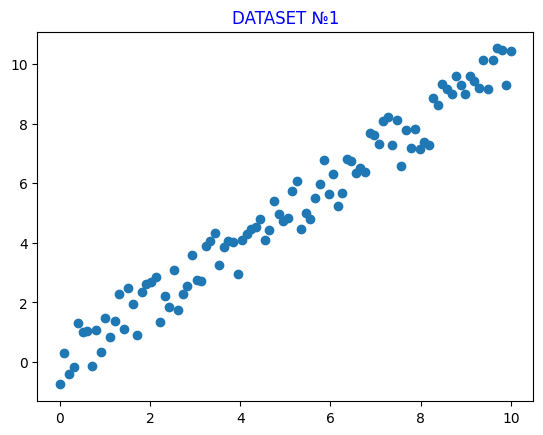

In [13]:
x1 = np.linspace(0, 10, 100)
y1 = x1 + np.random.rand(100) * 2 - 1
dataset1 = np.vstack((x1, y1)).T

np.savetxt('/content/drive/MyDrive/Colab Notebooks/UrFU Master semester 2/MLOps/lab5/dataset_1.txt', dataset1)

plt.scatter(x1, y1)
plt.title("DATASET №1", color='blue')
plt.show()

## 1.2 Создадим второй датасет

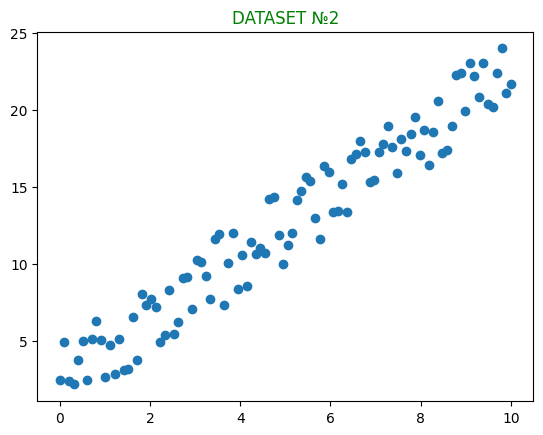

In [14]:
x2 = np.linspace(0, 10, 100)
y2 = 2 * x2 + np.random.rand(100) * 5
dataset2 = np.vstack((x2, y2)).T

np.savetxt('/content/drive/MyDrive/Colab Notebooks/UrFU Master semester 2/MLOps/lab5/dataset_2.txt', dataset2)

plt.scatter(x2, y2)
plt.title("DATASET №2", color='green')
plt.show()



## 1.3 Создадим третий датасет

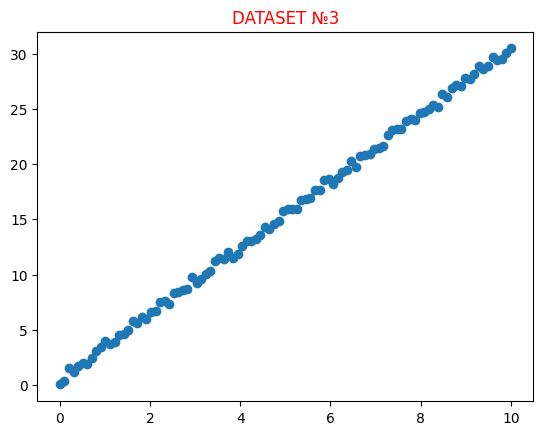

In [15]:
x3 = np.linspace(0, 10, 100)
y3 = 3 * x3 + np.random.rand(100)
dataset3 = np.vstack((x3, y3)).T

np.savetxt('/content/drive/MyDrive/Colab Notebooks/UrFU Master semester 2/MLOps/lab5/dataset_3.txt', dataset3)

plt.scatter(x3, y3)
plt.title("DATASET №3", color='red')
plt.show()

# 2. Обучение модели на первом датасете

In [16]:
model = LinearRegression()
X_train = dataset1[:, 0].reshape(-1, 1)
y_train = dataset1[:, 1]
model.fit(X_train, y_train)

LinearRegression()

# 3. Проверка mse

In [17]:
X_test = dataset1[:, 0].reshape(-1, 1)
y_test = dataset1[:, 1]
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# 4. Создание датасета с шумом

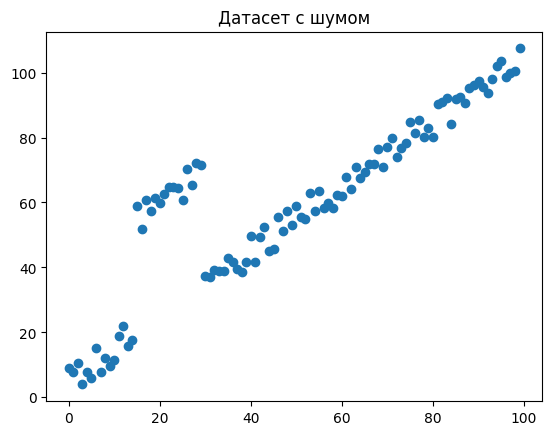

MSE on dataset 1:  0.3198874592844208


In [18]:
x_noisy = np.arange(100)
y_noisy = x_noisy + np.random.rand(100) * 10

# Сделаем "сдвиг", который не пройдет pytest
y_noisy[15:30] = y_noisy[15:30] + 35
dataset_noisy = np.vstack((x_noisy, y_noisy)).T

np.savetxt('/content/drive/MyDrive/Colab Notebooks/UrFU Master semester 2/MLOps/lab5/dataset_noisy.txt', dataset_noisy)

plt.scatter(x_noisy, y_noisy)
plt.title("Датасет с шумом")
plt.show()

print("MSE on dataset 1: ", mse)

# 5. Сохранение модели

In [19]:
# Сохранение модели
with open('/content/drive/MyDrive/Colab Notebooks/UrFU Master semester 2/MLOps/lab5/model.pkl', 'wb') as file:
    pickle.dump(model, file)

# 6. Тестирование работы модели
## ВНИМАНИЕ! Данный пункт должен выполняться в командной строке с использованием pytest и *.py-скрипта, однако для наглядной демонстрации включен в ноутбук.

In [20]:
def test_model_predictions():
    
    threshold = 150
    # Проверка на первом датасете
    X_test1 = dataset1[:, 0].reshape(-1, 1)
    y_test1 = dataset1[:, 1]
    y_pred1 = model.predict(X_test1)
    mse1 = mean_squared_error(y_test1, y_pred1)
    print("MSE on dataset 1: ", mse1)
    assert mse1 <= threshold, f"High error on dataset 1: MSE = {mse1}, threshold = {threshold}"

    

    # Проверка на втором датасете
    X_test2 = dataset2[:, 0].reshape(-1, 1)
    y_test2 = dataset2[:, 1]
    y_pred2 = model.predict(X_test2)
    mse2 = mean_squared_error(y_test2, y_pred2)
    print("MSE on dataset 2: ", mse2)
    assert mse2 <= threshold, f"High error on dataset 2: MSE = {mse2}, threshold = {threshold}"

    # Проверка на третьем датасете
    X_test3 = dataset3[:, 0].reshape(-1, 1)
    y_test3 = dataset3[:, 1]
    y_pred3 = model.predict(X_test3)
    mse3 = mean_squared_error(y_test3, y_pred3)
    print("MSE on dataset 3: ", mse3)
    assert mse3 <= threshold, f"High error on dataset 3: MSE = {mse3}, threshold = {threshold}"

    # Проверка на шумном датасете
    X_test_noisy = dataset_noisy[:, 0].reshape(-1, 1)
    y_test_noisy = dataset_noisy[:, 1]
    y_pred_noisy = model.predict(X_test_noisy)
    mse4 = mean_squared_error(y_test_noisy, y_pred_noisy)
    print("MSE on dataset noisy: ", mse4)
    assert mse4 <= threshold, f"High error on dataset noisy: MSE = {mse4}, threshold = {threshold}"
    
test_model_predictions()

MSE on dataset 1:  0.3198874592844208
MSE on dataset 2:  66.17886469263279
MSE on dataset 3:  142.13551149967768
MSE on dataset noisy:  272.74014443553256


AssertionError: ignored